## Financial Inclusion in Africa


### Background Information
Financial inclusion is the main obstacles to economic and human development in Africa as per studies and research conducted. Only 13.9% of the Adult population is estimated to have access to commercial bank accounts.
Acces to a bank account is a contributor to long term economic growth

## GOAl
Predict which individuals in Kenya,Uganda,Tanzania and Rwanda are most likely to have or use a bank account.   
In the process reveal insights into some of the key demographic factors that might drive individuals’ financial outcomes.

#### Importing essential modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import platform

In [2]:
def set_seed(SEED=42):
    np.random.seed = SEED
    os.environ['PYTHONHASHSEED'] = str(SEED)
    
set_seed()
version = platform.python_version()
print("Python : ",version)
print("Pandas : ",pd.__version__)
print("NumPy : ",np.__version__)
print("Seaborn : ",sns.__version__)

Python :  3.8.3
Pandas :  1.1.1
NumPy :  1.19.0
Seaborn :  0.11.0


### Getting our data

In [3]:
train = pd.read_csv('datasets/Train_v2.csv')
test = pd.read_csv('datasets/Test_v2.csv')
variable = pd.read_csv('datasets/VariableDefinitions.csv')
Submission = pd.read_csv('datasets/SubmissionFile.csv')

#### Visualize and understand our data

In [4]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
train.shape

(23524, 13)

In [7]:
variable

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 1.4+ MB


In [9]:
train.bank_account.replace(['Yes','No'],[1,0],inplace = True)

In [10]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


# Visualize Categorical values to establish patterns and insights

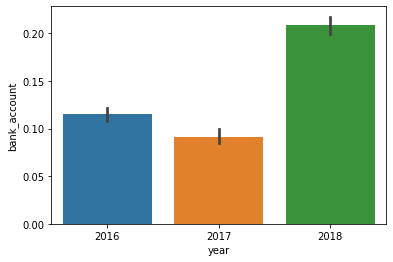

In [11]:
a = sns.barplot(x="year",y="bank_account",data=train)
a = a.set_ylabel("bank_account")

It seems that the probability of having a bank account for an individual in year 2018 is high as compared to other years

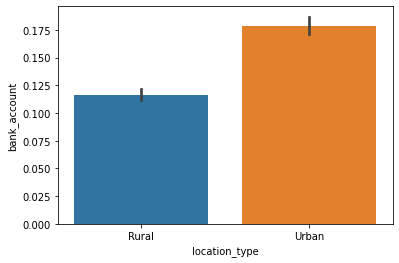

In [12]:
b = sns.barplot(x="location_type",y="bank_account",data=train)
b = b.set_ylabel("bank_account")

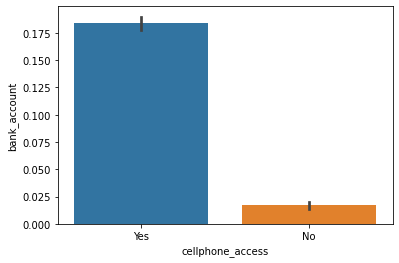

In [13]:
c = sns.barplot(x="cellphone_access",y="bank_account",data=train)
c = c.set_ylabel("bank_account")

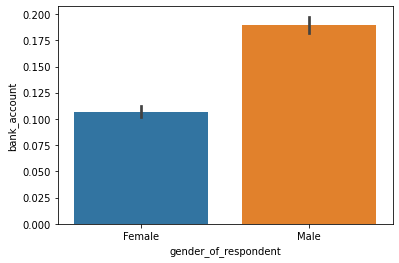

In [14]:
d = sns.barplot(x="gender_of_respondent",y="bank_account",data=train)
d = d.set_ylabel("bank_account")

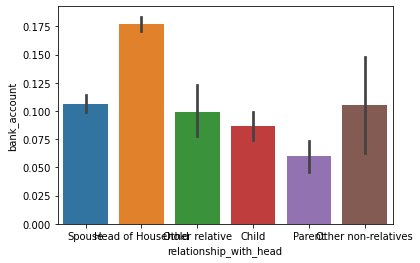

In [15]:
d = sns.barplot(x="relationship_with_head",y="bank_account",data=train)
d = d.set_ylabel("bank_account")

This indicates that the elderly are less likely to have a bank account.
It is also clear that if a respondent is the Head of the house, it is more likely for them to have a bank account

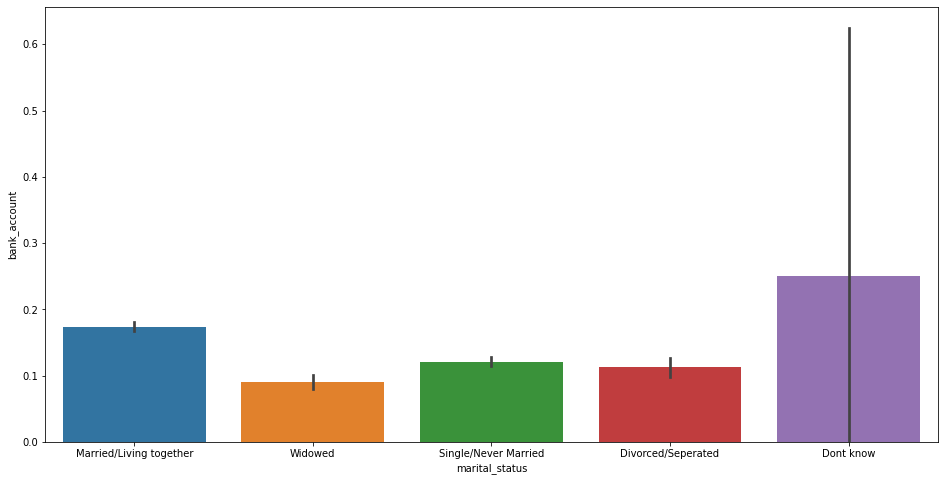

In [16]:
plt.figure(figsize=(16,8))
d = sns.barplot(x="marital_status",y="bank_account",data=train)
d = d.set_ylabel("bank_account")

Married individuals and those who are not aware where they stand in their relationship are more likely to have a bank account.
My assumption is individuals who are not aware of their marital status are most likely to be youths already working and trying to settle

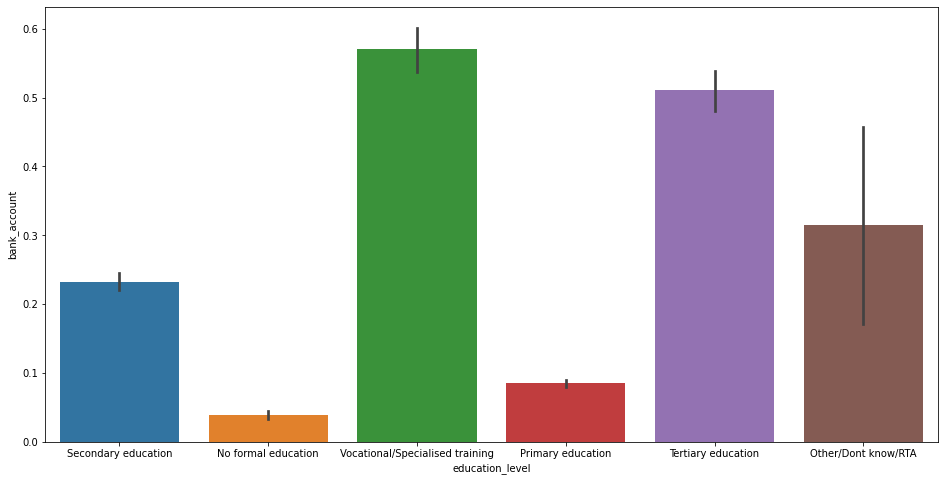

In [17]:
plt.figure(figsize=(16,8))
d = sns.barplot(x="education_level",y="bank_account",data=train)
d = d.set_ylabel("bank_account")

Individuals in tertiary and vocational training are most likely to have a bank account

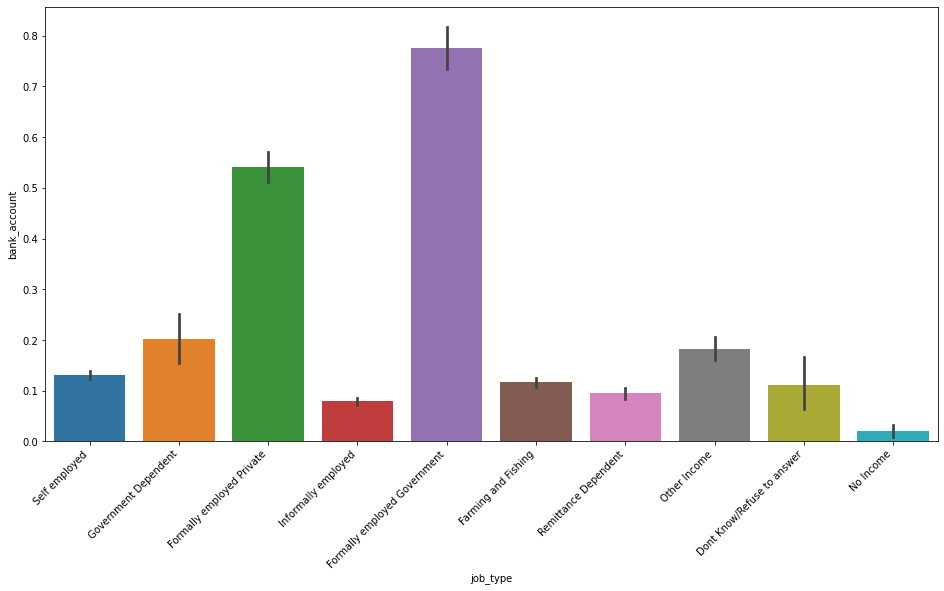

In [18]:
plt.figure(figsize=(16,8))
d = sns.barplot(x="job_type",y="bank_account",data=train)
d.set_xticklabels(d.get_xticklabels(), rotation=45, horizontalalignment='right')
d = d.set_ylabel("bank_account")



Individuals sith formal employment are more likely to have a bank account.

##### In summary we can say that an individual in formal employment, Who is the head of the house hold,with a vocation or tertially education, Married or about to get married(Dont Know-- likely in their prime youthful days),urban resident, with phone access, and surveyed in the year 2018 has 95 percent chance of having a bank account

### Feature Engineering
We concatenate the two datasets to achieve uniform feature conversions during thid exercise

In [19]:
train_len = len(train)
train_test = pd.concat([train,test],axis=0).reset_index(drop=True)

In [20]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33610 entries, 0 to 33609
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 33610 non-null  object 
 1   year                    33610 non-null  int64  
 2   uniqueid                33610 non-null  object 
 3   bank_account            23524 non-null  float64
 4   location_type           33610 non-null  object 
 5   cellphone_access        33610 non-null  object 
 6   household_size          33610 non-null  int64  
 7   age_of_respondent       33610 non-null  int64  
 8   gender_of_respondent    33610 non-null  object 
 9   relationship_with_head  33610 non-null  object 
 10  marital_status          33610 non-null  object 
 11  education_level         33610 non-null  object 
 12  job_type                33610 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 2.2+ MB


In [21]:
# Descriptive Analytics
tot_len = len(train_test.columns.tolist())
print('columns present are \n {} \n No of columns is {}'.format(train_test.columns.tolist(),tot_len))
train_test.count() # total number of values per column

columns present are 
 ['country', 'year', 'uniqueid', 'bank_account', 'location_type', 'cellphone_access', 'household_size', 'age_of_respondent', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type'] 
 No of columns is 13


country                   33610
year                      33610
uniqueid                  33610
bank_account              23524
location_type             33610
cellphone_access          33610
household_size            33610
age_of_respondent         33610
gender_of_respondent      33610
relationship_with_head    33610
marital_status            33610
education_level           33610
job_type                  33610
dtype: int64

In [22]:
leng = len(train_test.describe().keys().tolist())
print("No of numeric features is ", leng)
print("Number of non-numeric features are: ", tot_len-leng)

No of numeric features is  4
Number of non-numeric features are:  9


In [23]:
# visualize unique values in all the categorical features
n = train_test.nunique(axis=0)
print("unique values in each column are: \n", n)

unique values in each column are: 
 country                       4
year                          3
uniqueid                  12480
bank_account                  2
location_type                 2
cellphone_access              2
household_size               20
age_of_respondent            85
gender_of_respondent          2
relationship_with_head        6
marital_status                5
education_level               6
job_type                     10
dtype: int64


#### Categorical features that can be encoded are
    * country
    * year
    * bank_account
    * cellphone_access
    * gender_of_respondent
    * location_type

In [24]:
# Getting Dummies
def getdummies(dataset,col,pref):
    dataset = pd.get_dummies(dataset, columns = col, prefix=pref)
    return dataset

In [25]:
train_test = getdummies(train_test,["country","year","cellphone_access","gender_of_respondent","location_type"],["co","y","ce","g","l"])

In [26]:
train_test.head()

,uniqueid,bank_account,household_size,age_of_respondent,relationship_with_head,marital_status,education_level,job_type,co_Kenya,co_Rwanda,...,co_Uganda,y_2016,y_2017,y_2018,ce_No,ce_Yes,g_Female,g_Male,l_Rural,l_Urban
0,uniqueid_1,1.0,3,24,Spouse,Married/Living together,Secondary education,Self employed,1,0,...,0,0,0,1,0,1,1,0,1,0
1,uniqueid_2,0.0,5,70,Head of Household,Widowed,No formal education,Government Dependent,1,0,...,0,0,0,1,1,0,1,0,1,0
2,uniqueid_3,1.0,5,26,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,1,0,...,0,0,0,1,0,1,0,1,0,1
3,uniqueid_4,0.0,5,34,Head of Household,Married/Living together,Primary education,Formally employed Private,1,0,...,0,0,0,1,0,1,1,0,1,0
4,uniqueid_5,0.0,8,26,Child,Single/Never Married,Primary education,Informally employed,1,0,...,0,0,0,1,1,0,0,1,0,1


In [27]:
# lets drop the uniqueid since its insignificant
train_test.drop(columns=["uniqueid"],,inplace=True)

In [ ]:
def unique_vals(col):
    pd.unique(train_test.col)

In [28]:
# Unique columns in ralationship column
print("relationship with head unique vals",unique_vals(relationship_with_head))
print("marital_status unique vals",unique_vals(marital_status)
print("education_level unique vals",unique_vals(education_level)
print("job_unique vals",unique_vals(job_type)

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

In [29]:
# Transforming the relationship column
def col_transform(dataset,col,vals,reps): 
        dataset[col].replace(vals,reps,inplace = True)

In [30]:
col_transform(train_test,'relationship_with_head',['Spouse','Head of Household','Other relative','Child','Parent','Other non-relatives'],['S','H','O_R','C','P','N_R'])
# Transform marital_status column
col_transform(train_test,'marital_status',['Married/Living together','Widowed','Single/Never Married','Divorced/Seperated','Dont know'],['M','W','S','D','DN'])
# Transform education_level column
col_transform(train_test,'education_level',['Secondary education','No formal education','Vocational/Specialised training','Primary education','Tertiary education','Other/Dont know/RTA'],['S','N','V','P','T','ODR'])
# Transform job_type column
col_transform(train_test,'job_type',['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'],['SE','GD','FEP','IE','FEG','FF','RD','OI','DK','NI'])


In [39]:
# Get dummies of the remaining categorical features
train_test = getdummies(train_test,["relationship_with_head","marital_status","education_level","job_type"],["r","m","e","j"])

In [ ]:
train_test.head()

In [40]:
train_test.head()

,bank_account,household_size,age_of_respondent,co_Kenya,co_Rwanda,co_Tanzania,co_Uganda,y_2016,y_2017,y_2018,...,j_DK,j_FEG,j_FEP,j_FF,j_GD,j_IE,j_NI,j_OI,j_RD,j_SE
0,1.0,3,24,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.0,5,70,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1.0,5,26,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.0,5,34,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0.0,8,26,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [41]:
train_test.head()

,bank_account,household_size,age_of_respondent,co_Kenya,co_Rwanda,co_Tanzania,co_Uganda,y_2016,y_2017,y_2018,...,j_DK,j_FEG,j_FEP,j_FF,j_GD,j_IE,j_NI,j_OI,j_RD,j_SE
0,1.0,3,24,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.0,5,70,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1.0,5,26,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.0,5,34,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0.0,8,26,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


## Modelling
#### Models to test
    SVC
    Decision Tree
    AdaBoost
    Random Forest
    KNN
    Logistic regression
#### Other Models That can be used
    Extra Trees
    Gradient Boosting
    Multiple layer perceprton (neural network)
    Linear Discriminant Analysis

In [42]:
# obtain back our train and test datasets
train = train_test[:train_len]
testf = train_test[train_len:]
testf.drop(labels=["bank_account"],axis = 1,inplace=True)

c:\users\boniface\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [43]:
## Separate train features and label 

#train["bank_account"] = train["bank_account"].astype(int)

Y_train = train["bank_account"]

X_train = train.drop(labels = ["bank_account"],axis = 1)

In [44]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold,train_test_split
from sklearn.metrics import precision_score, recall_score,f1_score,confusion_matrix


sns.set(style='white', context='notebook', palette='deep')

## Evaluating our models with
    * Dimension Reduction
    * Without Reduction
 #### We start without Reduction

### Lets try and Rescale our data to see its effecton overall perfomance

In [45]:
# minimal error before this action is 0.113..Random Forest
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range=(0, 1))  

X_train_rescaled = scaler.fit_transform(X_train)
testf_rescaled = scaler.fit_transform(testf)

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(X_train_rescaled, Y_train, train_size=0.65,test_size=0.35, random_state=42)

In [47]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)
# KFold?

Optimal Model based on misclassification error Is:  SVC()
Minimal Error of our optimal model is: 0.11262262916939181


c:\users\boniface\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


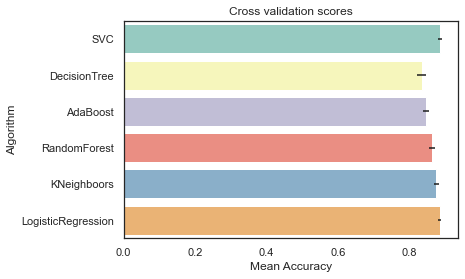

In [48]:
# Modeling step To Test differents algorithms 
classifiers = []
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(),learning_rate=0.1))
classifiers.append(RandomForestClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, xtrain, y = ytrain, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

#misclassification error
MSE = [1-x for x in cv_means]
#optimal Model
optimal_model_index = MSE.index(min(MSE))
optimal_model = classifiers[optimal_model_index]
print("Optimal Model based on misclassification error Is: ",optimal_model)
print("Minimal Error of our optimal model is:",min(MSE))


cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","KNeighboors","LogisticRegression"]})

# Visualize the model perfomance
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [49]:
# Lets Evaluate Our Best Two models
# In this case LogisticRegression and SVC
optimal_model.fit(xtrain,ytrain)
scores = optimal_model.predict(xtest)
# secod best model is classifiers[4]
classifiers[4].fit(xtrain,ytrain)
scores2 = classifiers[4].predict(xtest)
# Evaluating model perfomance using confusion matrix metrics

print(optimal_model," precision score is : ",precision_score(ytest,scores))
print(optimal_model," Recall score is : ",recall_score(ytest,scores))
print(optimal_model," F1 score is : ",f1_score(ytest,scores))

print(classifiers[4]," Precision score is : ",precision_score(ytest,scores2))
print(classifiers[4]," Recall score is : ",recall_score(ytest,scores2))
print(classifiers[4]," F1 score is : ",f1_score(ytest,scores2))

SVC()  precision score is :  0.7401574803149606
SVC()  Recall score is :  0.3263888888888889
SVC()  F1 score is :  0.4530120481927711
KNeighborsClassifier()  Precision score is :  0.594017094017094
KNeighborsClassifier()  Recall score is :  0.3619791666666667
KNeighborsClassifier()  F1 score is :  0.4498381877022654


In [50]:
# confusion matrix
print(optimal_model," Confusion matrix: ")
confusion_matrix(ytest,scores)

SVC()  Confusion matrix: 


array([[6950,  132],
       [ 776,  376]], dtype=int64)

In [51]:
print(classifiers[4]," Confusion matrix: ")
confusion_matrix(ytest,scores2)

KNeighborsClassifier()  Confusion matrix: 


array([[6797,  285],
       [ 735,  417]], dtype=int64)

## It is Clear that our LogisticRegression model perfoms better than the KneighboursClassifier
#### 

In [52]:
Submission.head()

,uniqueid,bank_account
0,uniqueid_7867 x Kenya,1.0
1,uniqueid_6722 x Kenya,0.0
2,uniqueid_6714 x Kenya,1.0
3,uniqueid_8103 x Kenya,1.0
4,uniqueid_8657 x Kenya,1.0


In [53]:
final_results = list(map(float,optimal_model.predict(testf_rescaled)))
Submission['Bank_account'] = final_results
Submission['uniqueid'] = test['uniqueid'].astype(str) + ' x ' +  test['country'].astype(str)
Submission = Submission[['uniqueid','Bank_account']]

In [54]:
Submission.Bank_account.value_counts()

0.0    9475
1.0     611
Name: Bank_account, dtype: int64

In [55]:
Submission.to_csv('financial_inclusion2.csv', index=False)

### TODO
### Remodel with dimensionality reduction
#### Remodel with additional feature addition
#### Remodel with optimal k value for the knn classifier
## Remodel with minmaxscaling --done
## remodel with country and year dropped
### Use the XGBoost model


# Findings1
* When our data is rescalled, the svc perfoms better than The LogisticRegression resulting to minimal misclassification error.
* Model perfomance 1. SVC 2. Logisticegression 3. KNN
* It is clear that svc perfomes better with data of uniform size.